<a href="https://colab.research.google.com/github/anju-balan/AI_Assignment/blob/main/Anju_Balan_C0796667.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Midterm Assignment** 

---


# Use fashion MNIST dataset; available in TF/ Keras datasets; and make a TF model (from-scratch) to learn this dataset.

In [41]:
#Import all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)


Mounted at /content/drive/


In [42]:
#Imported the dataset to the google drive and read it for the model
df_test = pd.read_csv('/content/drive/My Drive/My data files/fashion-mnist_test.csv',header=0)
df_train = pd.read_csv('/content/drive/My Drive/My data files/fashion-mnist_train.csv',header=0)

Check whether the data is loaded successfully by displaying head and tail records

In [43]:
#Display the head from test dataset 
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [44]:
#Display the head from train dataset 
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


Convert the data frame into NumPy array so that it can be used by TensorFlow and Keras

In [45]:
data_test = np.array(df_test, dtype='float32')
data_train = np.array(df_train, dtype='float32')

Slice the training and Test data to x (input attributes/independednt vaiable) and y (output/dependednt variable). Also scale the pixel data as it is ranging from 0-255. For this just devide the x_train and x_test dataset by 255.

In [46]:
x_train = data_train[:,1:] / 255
y_train = data_train[:,0]

x_test = data_test[:,1:] / 255
y_test = data_test[:,0]

Split the training set as train and validate set so that we can validate the result after training the model.

In [47]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=.2, random_state=19, )

Check the dataset for the images in it.The image raw should be reshaped to the original image shape that is 28*28

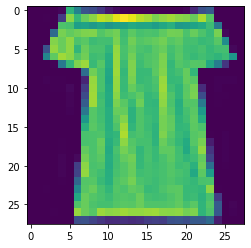

In [48]:
img = x_train[99, :].reshape((28, 28))
plt.imshow(img)
plt.show()

Define the model
Compile the model
Fit the model


In [49]:
image_rows = 28
image_columns = 28
batch_size = 512
image_shape = (image_rows,image_columns,1)

x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))


x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


# Define the model


> You can define each layer one by one using the add() function , but here I am passing the layers as a list of parameters. 

**First layer** - Conv2D takes the kernel and slides it across all the images. It tells how much overlap is there between kernel and the image, higher the similarity tthe higher the value. filters define output dimention. 

**MaxPooling2D** - poolsize tells how much you down size . Here height and width is reduces by 2 means, it becomes 14*14

**Dropout** Randomly drop out certain conections for the next layer

Add a few **Dense** layer and finally the output layer

In [50]:
cnn_model = Sequential([
                   Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=image_shape),  
                   MaxPooling2D(pool_size=2),
                   Dropout(0.2),
                   Flatten(),
                   Dense(32, activation='relu'),
                   Dense(10,activation='softmax')
])

# Compile the model

In [51]:
cnn_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

Fit and train the model with training dataset 

In [52]:
cnn_model.fit(x_train, y_train, batch_size=batch_size, 
              epochs =10,verbose=1,
              validation_data=(x_validate, y_validate),
)

Epoch 1/10
94/94 [==============================] - 17s 179ms/step - loss: 1.1314 - accuracy: 0.6437 - val_loss: 0.4652 - val_accuracy: 0.8355
Epoch 2/10
94/94 [==============================] - 17s 179ms/step - loss: 0.4451 - accuracy: 0.8437 - val_loss: 0.3930 - val_accuracy: 0.8599
Epoch 3/10
94/94 [==============================] - 17s 179ms/step - loss: 0.3871 - accuracy: 0.8647 - val_loss: 0.3556 - val_accuracy: 0.8763
Epoch 4/10
94/94 [==============================] - 17s 178ms/step - loss: 0.3585 - accuracy: 0.8748 - val_loss: 0.3685 - val_accuracy: 0.8670
Epoch 5/10
94/94 [==============================] - 17s 181ms/step - loss: 0.3420 - accuracy: 0.8790 - val_loss: 0.3335 - val_accuracy: 0.8842
Epoch 6/10
94/94 [==============================] - 17s 179ms/step - loss: 0.3179 - accuracy: 0.8878 - val_loss: 0.3198 - val_accuracy: 0.8884
Epoch 7/10
94/94 [==============================] - 17s 179ms/step - loss: 0.3071 - accuracy: 0.8906 - val_loss: 0.3155 - val_accuracy: 0.8914

# Evaluate the model for Accuracy

In [53]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('test loss: {:.4f}'.format(score[0]))
print('test accuravycy: {:.4f}'.format(score[1]))

test loss: 0.2782
test accuravycy: 0.9038


Take one of the images from the test dataset to predict the result

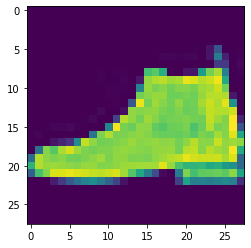

In [54]:
img = x_test[100, :].reshape((28, 28))

plt.imshow(img)
plt.show()

It has predicted to 9, which means Ankle boot. The prediction by the model is correct.

The labels are :
•	0 - T-shirt/top
•	1 - Trouser
•	2 - Pullover
•	3 - Dress
•	4 - Coat
•	5 - Sandal
•	6 - Shirt
•	7 - Sneaker
•	8 - Bag
•	9 - Ankle boot


In [55]:
ThePrediction = cnn_model.predict(x_test[100, :].reshape(1,28,28,1))
print(ThePrediction)
print(ThePrediction.argmax())

[[1.0828267e-06 4.2461263e-08 1.7302201e-08 7.9414676e-08 9.5601280e-08
  1.0231956e-03 7.9953470e-06 1.4796445e-02 5.8873447e-05 9.8411208e-01]]
9
